In [1]:
# Numpy
import numpy as np

# xarray
import xarray as xr

# matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

# time
import datetime
from cftime import num2date

import cmocean  # for nice oceanographic colormaps

#JUPYTER notebook magics
%matplotlib inline 


In [2]:
file = 'forcing_polynya.nc'
ds = xr.open_dataset('forcing_polynya.nc', group='data', engine='netcdf4')
ds


<xarray.Dataset>
Dimensions:     (ydim: 50, xdim: 100, time: 12)
Coordinates:
  * time        (time) float64 1.68e+09 1.68e+09 1.68e+09 ... 1.68e+09 1.68e+09
Dimensions without coordinates: ydim, xdim
Data variables:
    longitude   (ydim, xdim) float64 ...
    latitude    (ydim, xdim) float64 ...
    dew2m       (time, ydim, xdim) float64 ...
    lw_in       (time, ydim, xdim) float64 ...
    sw_in       (time, ydim, xdim) float64 ...
    pair        (time, ydim, xdim) float64 ...
    tair        (time, ydim, xdim) float64 ...
    wind_speed  (time, ydim, xdim) float64 ...
    u           (time, ydim, xdim) float64 ...
    v           (time, ydim, xdim) float64 ...

In [3]:
%%bash

# Run the model with the config file for a realistic run
time /home/nextsimdg/build/nextsim --config-file config_files/config_tnb_windforcing.cfg

2023-04-01T00:00:00Z
2023-04-01T00:02:00Z
2023-04-01T00:04:00Z
2023-04-01T00:06:00Z
2023-04-01T00:08:00Z
2023-04-01T00:10:00Z
2023-04-01T00:12:00Z
2023-04-01T00:14:00Z
2023-04-01T00:16:00Z
2023-04-01T00:18:00Z
2023-04-01T00:20:00Z
2023-04-01T00:22:00Z
2023-04-01T00:24:00Z
2023-04-01T00:26:00Z
2023-04-01T00:28:00Z
2023-04-01T00:30:00Z
2023-04-01T00:32:00Z
2023-04-01T00:34:00Z
2023-04-01T00:36:00Z
2023-04-01T00:38:00Z
2023-04-01T00:40:00Z
2023-04-01T00:42:00Z
2023-04-01T00:44:00Z
2023-04-01T00:46:00Z
2023-04-01T00:48:00Z
2023-04-01T00:50:00Z
2023-04-01T00:52:00Z
2023-04-01T00:54:00Z
2023-04-01T00:56:00Z
2023-04-01T00:58:00Z
2023-04-01T01:00:00Z
2023-04-01T01:02:00Z
2023-04-01T01:04:00Z
2023-04-01T01:06:00Z
2023-04-01T01:08:00Z
2023-04-01T01:10:00Z
2023-04-01T01:12:00Z
2023-04-01T01:14:00Z
2023-04-01T01:16:00Z
2023-04-01T01:18:00Z
2023-04-01T01:20:00Z
2023-04-01T01:22:00Z
2023-04-01T01:24:00Z
2023-04-01T01:26:00Z
2023-04-01T01:28:00Z
2023-04-01T01:30:00Z
2023-04-01T01:32:00Z
2023-04-01T01


real	6m8.628s
user	59m31.908s
sys	0m21.905s


In [5]:
# Load the NetCDF file
ds = xr.open_dataset("TNB_windforced.nc", group="/data")
print(ds)

# We (still) need to fetch the mask from the init file
mask = xr.open_dataset("init_terranova.nc", group="/data")['mask']
land = np.where(mask == 0, 1, np.nan)  # 1 = land, nan = ocean

time = ds['time']
time_vals = num2date(time.values, units='seconds since 1970-01-01', calendar='gregorian')

time_index = 2

<xarray.Dataset>
Dimensions:         (time: 3, ydim: 50, xdim: 100, dg_comp: 6, yvertex: 51,
                     xvertex: 101, ncoords: 2, zdim: 3)
Coordinates:
  * time            (time) float64 1.68e+09 1.68e+09 1.68e+09
Dimensions without coordinates: ydim, xdim, dg_comp, yvertex, xvertex, ncoords,
                                zdim
Data variables: (12/58)
    C_ICE_DG        (time, ydim, xdim, dg_comp) float64 ...
    H_ICE_DG        (time, ydim, xdim, dg_comp) float64 ...
    OW_STRESS_X     (time, ydim, xdim) float64 ...
    OW_STRESS_Y     (time, ydim, xdim) float64 ...
    Q_SW_BASE       (time, ydim, xdim) float64 ...
    Q_SW_OW         (time, ydim, xdim) float64 ...
    ...              ...
    v               (time, ydim, xdim) float64 ...
    wind_speed      (time, ydim, xdim) float64 ...
    wind_u          (time, ydim, xdim) float64 ...
    wind_v          (time, ydim, xdim) float64 ...
    x               (time, ydim, xdim) float64 ...
    y               (time, ydim

In [6]:
# Striding for u and v
ny, nx = ds['u'].isel(time=0).shape
Y, X = np.meshgrid(np.arange(ny), np.arange(nx), indexing='ij')

stride = 5

u = ds['u'].isel(time=time_index)[::stride, ::stride]
v = ds['v'].isel(time=time_index)[::stride, ::stride]
x = X[::stride, ::stride]
y = Y[::stride, ::stride]

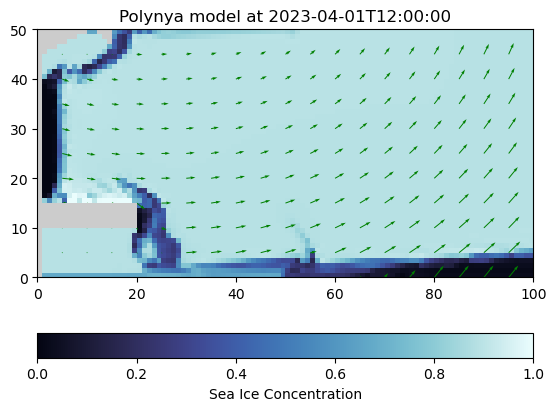

In [7]:
# NB - we need to pick the first DG component, as well as a time slice
var = ds['cice'].isel(time=time_index).isel(dg_comp=0)

plt.figure()
p = plt.pcolormesh(var, shading='auto', cmap='cmo.ice', vmin=0, vmax=1)
plt.gca().set_aspect('equal')

plt.colorbar(p, label='Sea Ice Concentration', orientation='horizontal')

plt.quiver(x, y, u, v, scale=5, color='g', width=0.002)

plt.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)

plt.title(f"Polynya model at {time_vals[time_index].isoformat()}")

#plt.xticks([])
#plt.yticks([])

plt.savefig('images/' + file + 'SIC.png' , bbox_inches='tight' )

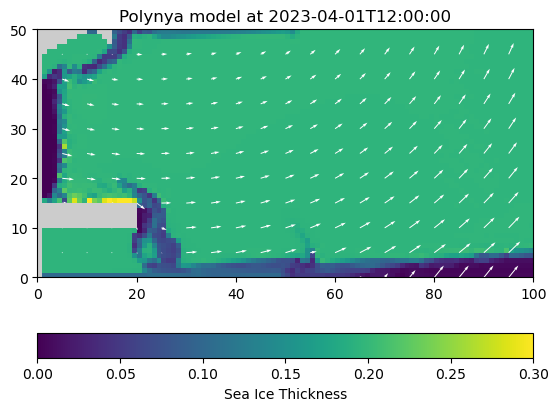

In [10]:
var = ds['hice'].isel(time=time_index).isel(dg_comp=0)

plt.figure()
p = plt.pcolormesh(var, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
plt.gca().set_aspect('equal')

plt.colorbar(p, label='Sea Ice Thickness', orientation='horizontal')

plt.quiver(x, y, u, v, scale=5, color='w', width=0.002)

plt.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)

plt.title(f"Polynya model at {time_vals[time_index].isoformat()}")

plt.savefig('images/' + file + 'SIH.png' , bbox_inches='tight' )
plt.show()